<a href="https://colab.research.google.com/github/EduardoPatron/Advance-Numerical-Analysis/blob/main/Colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Método de colocación.
Considerando el problema de frontera
$$ y'' = f(t,y,y') \atop
y(a) = y_a, y(b) = y_b $$

Escojiendo $n$ puntos, empezando y terminando por los puntos de la fronteta. Es decir,
$$ a = t_1 < t_2 < ... < t_{n-1} < t_n = b $$
Es importante notar que dichos nodos no necesariamente son equidistantes. Lo que es una ventaja para datos reales los cuales no es comun que satisfagan este supuesto.

El **método de colocación** considera a una función cadidata de la forma
$$ y(t) = \sum_{j=1}^n c_j \phi_j(t) $$
de modo que al sustituir en la EDO y evaluando en los $t_i$ se tiene un sistema de $n$ ecuaciones para las constantes $c_1, c_2, ..., c_n$.

Hay diferentes formas de determinar las funciones $\phi_j$. Pueden ser funciones polinomicas, exponenciales, de onda, splines, etc.

# Problema a, página 372
$$ 9y'' + \pi^2 y = 0$$
con condiciones de frontera $y(0) = -1, y(3/2) = 3$.

Solución exacta, $y(t) = 3\sin(\pi t/3) - \cos(\pi t/3)$.

In [ ]:
# Condiciones del problema
a, b = 0, 3/2
ya, yb = -1, 3
N = 8 # Número de nodos

t = np.linspace(a, b, N)

Dada la estructura de la ecuación diferencial, suponiendo que
$$ y(t) = \sum_{j=1}^n c_j t^j $$

tenemos que las constantes satisfacen la ecuaciones
$$c_1 = -1$$
$$ \sum_{j=1}^n [j(j-1)t^{j-2} - 3t^j + 2jt^{j-1}]c_j = 0 $$
$$ \sum_{j=1}^n c_j(3/2)^j = 3 $$

Lo cual se puede representar de forma matricial, considerando los tiempos $t_i$, y se implementara de esa manera.

In [ ]:
# Matriz de movimiento
A = np.zeros((N,N))

A[0,0] = 1 # Primera ecuación

# Renglones intermedios
for j in range(N):
  A[1:-1, j] = 9*j*(j-1)*t[1:-1]**(j-2) + (np.pi**2)*t[1:-1]**j #Error de los indeces

# Última ecuación
last = np.zeros(N)
for j in range(N):
  last[j] = (3/2)**j

A[-1, :] = last

# Vector
v = np.zeros(N)
v[0], v[-1] = ya, yb

In [ ]:
def colocacion(A, b, t):
  coef = np.linalg.solve(A, b)

  # Modelo propuesto (polinominal)
  y = coef[0]*np.ones(N)
  for i in range(1,N):
    y += coef[i]*t**i
  return y

In [ ]:
sol = colocacion(A, v, t)

In [ ]:
def y(t):
  return 3*np.sin((np.pi/3)*t ) - np.cos((np.pi/3)*t)

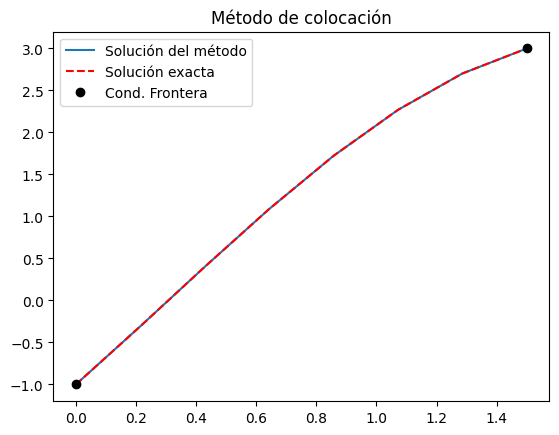

In [ ]:
plt.plot(t, sol, '-', label = 'Solución del método')
plt.plot(t, y(t), '--r', label = 'Solución exacta')
plt.plot([a,b], [ya, yb], 'ok', label = 'Cond. Frontera')

plt.title('Método de colocación')
plt.legend()
plt.show()

## Problema b, página 372.
$$ y'' = 3y - 2y' $$
con condiciones de frontera $ y (0) = e^3$, $y(1) = 1$.

Solución exacta, $y = e^{3-3t}$.

In [ ]:
# Condiciones del problema
a, b = 0, 1
ya, yb = np.exp(3), 1
N = 8 # Número de nodos

t = np.linspace(a, b, N)

Dada la estructura de la ecuación diferencial, suponiendo que
$$ y(t) = \sum_{j=1}^n c_j t^j $$

tenemos que las constantes satisfacen la ecuaciones
$$c_1 = e^3$$
$$ \sum_{j=1}^n [j(j-1)t^{j-2} - 3t^j + 2jt^{j-1}]c_j = 0 $$
$$ \sum_{j=1}^n c_j = 1 $$

Lo cual se puede representar de forma matricial, considerando los tiempos $t_i$, y se implementara de esa manera.

In [ ]:
# Matriz de movimiento
A = np.zeros((N,N))

A[0,0] = 1 # Primera ecuación

# Renglones intermedios
for j in range(N):
  A[1:-1, j] = j*(j-1)*t[1:-1]**(j-2) + 2*j*t[1:-1]**(j-1) - 3*t[1:-1]**j #Error de los indeces

A[-1, :] = np.ones(N) # Última ecuación

# Vector
v = np.zeros(N)
v[0], v[-1] = ya, yb

In [ ]:
sol = colocacion(A,v,t)

In [ ]:
def y(t):
  return np.exp(3-3*t)

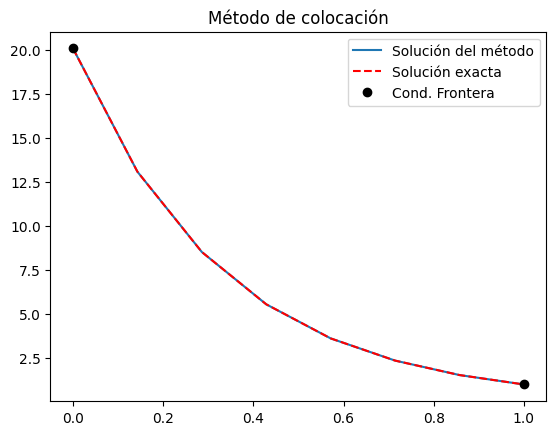

In [ ]:
plt.plot(t, sol, '-', label = 'Solución del método')
plt.plot(t, y(t), '--r', label = 'Solución exacta')
plt.plot([a,b], [ya,yb], 'ok', label = 'Cond. Frontera')

plt.title('Método de colocación')
plt.legend()
plt.show()